In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats

In [153]:
df = pd.read_csv("../googleplaystore.csv")

In [154]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [156]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [157]:
mean_rating = df["Rating"].mean()
df['Rating'] = df['Rating'].fillna(mean_rating)

In [158]:
df['Rating']

0        4.100000
1        3.900000
2        4.700000
3        4.500000
4        4.300000
           ...   
10836    4.500000
10837    5.000000
10838    4.193338
10839    4.500000
10840    4.500000
Name: Rating, Length: 10841, dtype: float64

In [159]:
numeric_columns = df.select_dtypes(include=[np.number])
df[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())
df[numeric_columns.columns]

,Rating
0,4.100000
1,3.900000
2,4.700000
3,4.500000
4,4.300000
...,...
10836,4.500000
10837,5.000000
10838,4.193338
10839,4.500000


In [160]:
non_numeric_columns = df.select_dtypes(include=['object'])
df[non_numeric_columns.columns] = non_numeric_columns.fillna(non_numeric_columns.mode().iloc[0])
df[non_numeric_columns.columns]

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [161]:
duplicates = df.drop_duplicates(inplace=True)

c:\Users\Allen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


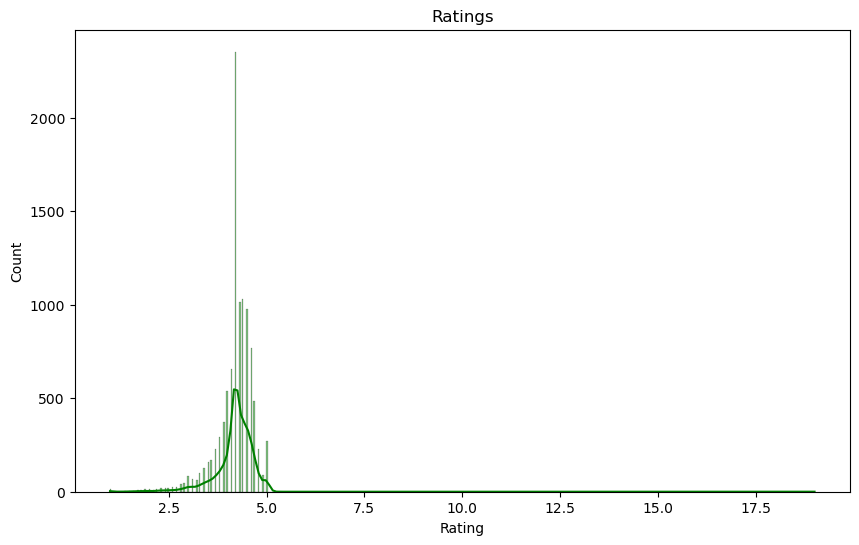

In [162]:
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'], kde=True, color='green')
plt.title('Ratings')
plt.show()

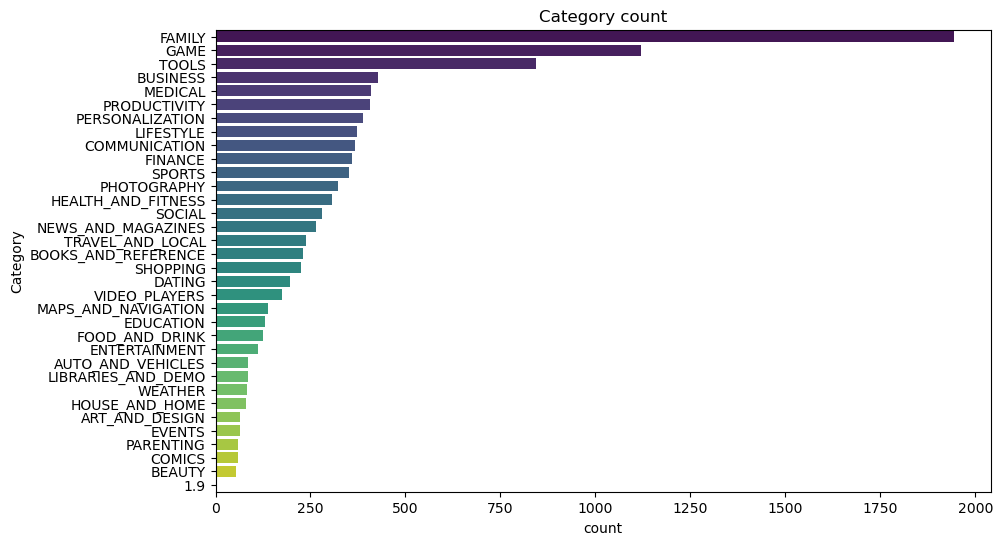

In [163]:
plt.figure(figsize=(10,6))
sns.countplot(y='Category', data=df, order=df["Category"].value_counts().index, palette='viridis')
plt.title('Category count')
plt.show()

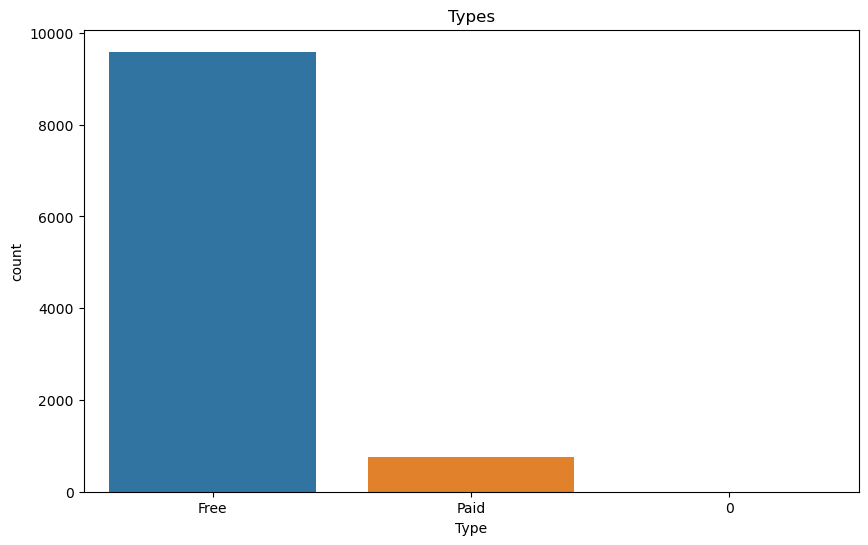

In [164]:
plt.figure(figsize=(10,6))
sns.countplot(x='Type', data=df)
plt.title('Types')
plt.show()

In [165]:
z_score = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df = df[(z_score < 3).all(axis=1)]
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [166]:
df['Rating'].describe()

count    10185.000000
mean         4.224167
std          0.398148
min          2.700000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [167]:
df_standart = df.copy()
df_standart[numeric_columns.columns] = (df_standart[numeric_columns.columns] - df_standart[numeric_columns.columns].mean()) \
        / (df_standart[numeric_columns.columns].std())

In [168]:
df_standart['Rating'].describe()

count    1.018500e+04
mean     1.562706e-16
std      1.000000e+00
min     -3.828141e+00
25%     -3.118613e-01
50%     -6.069847e-02
75%      6.927901e-01
max      1.948604e+00
Name: Rating, dtype: float64

In [169]:
scaler = StandardScaler()
df_standart[['Rating']] = scaler.fit_transform(df[['Rating']])

In [170]:
df_standart['Rating'].describe()

count    1.018500e+04
mean     1.841760e-16
std      1.000049e+00
min     -3.828329e+00
25%     -3.118766e-01
50%     -6.070145e-02
75%      6.928241e-01
max      1.948700e+00
Name: Rating, dtype: float64

In [171]:
le = LabelEncoder()
df['Type_Encoded'] = le.fit_transform(df['Type'])
df['Type_Encoded'].describe()

count    10185.000000
mean         0.073932
std          0.261673
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Type_Encoded, dtype: float64

In [172]:
df = pd.get_dummies(df, columns = ['Content Rating'], prefix='ContentRating', drop_first=True)

In [173]:
new_table = df.pivot_table(index='Category', columns='ContentRating_Teen', values='Rating', aggfunc='mean')
new_table

ContentRating_Teen,False,True
Category,,
ART_AND_DESIGN,4.344839,4.466667
AUTO_AND_VEHICLES,4.235610,4.200000
BEAUTY,4.272668,4.064446
BOOKS_AND_REFERENCE,4.313175,4.299683
BUSINESS,4.178059,4.226157
COMICS,4.228597,4.031818
COMMUNICATION,4.173294,4.282152
DATING,4.072742,4.116003
EDUCATION,4.371266,4.800000


In [174]:
df.to_csv('new_goglestore.csv')